<a href="https://colab.research.google.com/github/Kaproc/An-lisis-Opinion-Git/blob/main/src/analisis_sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RF-01: Recolección de Datos**

En esta sección, nos conectamos a la API de GitHub para extraer mensajes reales (títulos y descripciones) del repositorio **yt-dlp/yt-dlp** Los datos se recolectan y se organizan en un formato de tabla (DataFrame) para su posterior procesamiento

In [2]:
!pip install PyGithub
from github import Github  #Paso Necesario para conecctarse a la API de Git Hub.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
#Para tratar con los metodos de panda y archivos CSV

In [4]:
!git clone https://github.com/Kaproc/An-lisis-Opinion-Git

Cloning into 'An-lisis-Opinion-Git'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 57 (delta 18), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (57/57), 822.05 KiB | 2.40 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [6]:
repositorios = g.search_repositories(query='language:python', sort='stars', order='desc')   #Aquí se busca imprimir los mejores repositorios según sus estrellas.
print("Repositorios que pueden servir para el proyecto")
for i, repo in enumerate(repositorios[:10]):
    print(f"{i+1}. {repo.full_name} - (Estrellas: {repo.stargazers_count})")

Repositorios que pueden servir para el proyecto
1. public-apis/public-apis - (Estrellas: 397912)
2. EbookFoundation/free-programming-books - (Estrellas: 382468)
3. donnemartin/system-design-primer - (Estrellas: 335090)
4. vinta/awesome-python - (Estrellas: 282434)
5. TheAlgorithms/Python - (Estrellas: 217627)
6. Significant-Gravitas/AutoGPT - (Estrellas: 181784)
7. AUTOMATIC1111/stable-diffusion-webui - (Estrellas: 160511)
8. huggingface/transformers - (Estrellas: 156383)
9. yt-dlp/yt-dlp - (Estrellas: 146748)
10. langflow-ai/langflow - (Estrellas: 144736)


In [7]:
repo_elegido = "yt-dlp/yt-dlp"   #
repo = g.get_repo(repo_elegido)
issues = repo.get_issues(state='all')
mensajes = []
for i, issue in enumerate(issues):
    if i >= 500: break
    mensajes.append({
        'texto': f"{issue.title} {issue.body}"
    })
import pandas as pd
df_datos = pd.DataFrame(mensajes)
print(f"Mensajes descargados de {repo_elegido}:")
df_datos

Mensajes descargados de yt-dlp/yt-dlp:


,texto
0,Live Stream Download Prematurely Terminating #...
1,GDCVault: restored basic downloading ### Descr...
2,Language selection in audio streams ### Checkl...
3,yt-dlp -U made my keyboard act up ### Chec...
4,xhamster.com Broken Site Fix Requst ### Checkl...
...,...
495,[TikTok] Unable to extract webpage video data ...
496,"YT: ""No supported JavaScript runtime could be ..."
497,ceskaTelevize: calling new endpoint <!--\r\n ...
498,Windows defender Flagging. ### Checklist\n\n- ...


In [8]:
from google.colab import files #Para descargar el archivo csv creado.

In [ ]:
df_datos.to_csv('dataset_repositorio_grupo5.csv', index=False, encoding='utf-8-sig')
files.download('dataset_repositorio_grupo5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**## RF-02: Preprocesamiento de Texto**

Aquí aplicamos técnicas de limpieza y normalización:

**Normalización**: Conversión a minúsculas.

**Limpieza**: Eliminación de URLs (http), signos de puntuación, caracteres especiales y números.

**Stopwords**: Eliminación de palabras comunes que no aportan significado semántico al análisis de sentimiento.

In [9]:
import nltk                              #Librería necesaria para la limpieza de los datos
from nltk.corpus import stopwords
import re


In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def limpiar_texto(texto):
    texto = str(texto).lower() #Conversión de todo a minusculas.
    # Eliminar enlaces (URLs) y menciones de usuarios
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
    texto = re.sub(r'@\w+', '', texto)
    #  Eliminar caracteres especiales y números
    texto = re.sub(r'\W', ' ', texto)
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    #  Eliminar espacios extras
    texto = re.sub(r'\s+', ' ', texto).strip()
    #  Quitar palabras "basura" (Stopwords)
    palabras = texto.split()
    palabras_limpias = [p for p in palabras if p not in stop_words]
    return " ".join(palabras_limpias)
df_datos['texto_limpio'] = df_datos['texto'].apply(limpiar_texto)
df_datos[['texto', 'texto_limpio']].head()

,texto,texto_limpio
0,Live Stream Download Prematurely Terminating #...,live stream download prematurely terminating c...
1,GDCVault: restored basic downloading ### Descr...,gdcvault restored basic downloading descriptio...
2,Language selection in audio streams ### Checkl...,language selection audio streams checklist ask...
3,yt-dlp -U made my keyboard act up ### Chec...,yt dlp made keyboard act checklist asking ques...
4,xhamster.com Broken Site Fix Requst ### Checkl...,xhamster com broken site fix requst checklist ...


In [ ]:
nombre_archivo_limpio = "dataset_limpio_grupo5.csv"
df_datos.to_csv(nombre_archivo_limpio, index=False, encoding='utf-8-sig')
files.download(nombre_archivo_limpio)

print(f"Descarga de  '{nombre_archivo_limpio}' Data Limpia")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descarga de  'dataset_limpio_grupo5.csv' Data Limpia


In [12]:
def limpieza_final(texto):
    # Elimina palabras que contengan 'http', 'www' o que sean solo números
    palabras = texto.split()
    palabras_filtradas = [p for p in palabras if 'http' not in p and not p.isdigit() and len(p) > 2]
    return " ".join(palabras_filtradas)

# Aplicado a la data que ya habiamos limpiado, preocupación sobre que cosas como http sean ruido.

if 'texto_limpio' not in df_datos.columns:
    print("Warning: 'texto_limpio' column not found. Re-applying initial cleaning from 'texto'.")
    # Assuming 'limpiar_texto' function and 'stop_words' are defined in the kernel due to prior cell execution.
    df_datos['texto_limpio'] = df_datos['texto'].apply(limpiar_texto)

df_datos['texto_limpio'] = df_datos['texto_limpio'].apply(limpieza_final)
print("Texto 100% pulido:")
print(df_datos['texto_limpio'].head())

Texto 100% pulido:
0    live stream download prematurely terminating c...
1    gdcvault restored basic downloading descriptio...
2    language selection audio streams checklist ask...
3    dlp made keyboard act checklist asking questio...
4    xhamster com broken site fix requst checklist ...
Name: texto_limpio, dtype: object


In [ ]:
nombre_final = "dataset_final_limpio.csv"
df_datos.to_csv(nombre_final, index=False, encoding='utf-8-sig')
files.download(nombre_final)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  RF-03: Representación Textual (TF-IDF)
En esta etapa convertimos los mensajes de texto limpio a una matriz numérica usando **TF-IDF**.
- **TF (Term Frequency):** Mide qué tan frecuente es una palabra en un mensaje.
- **IDF (Inverse Document Frequency):** Penaliza palabras que aparecen en todos lados (como "the", "a") y resalta las únicas.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer  #Necesario para vectorizar el texto.

In [15]:
vectorizador = TfidfVectorizer(ngram_range=(1, 2), max_features=1000)
# 2. Transformamos la columna de texto limpio en una matriz numérica
# Usamos el texto que ya pasó por el RF-02
tfidf_matrix = vectorizador.fit_transform(df_datos['texto_limpio'])
# 3. Mostramos el resultado técnico (Matriz dispersa)
print(f"Matriz TF-IDF generada: {tfidf_matrix.shape}")
vocabulario = vectorizador.get_feature_names_out()
print("\nPrimeras 20 palabras/bigramas del vocabulario:")
print(vocabulario[:20])

Matriz TF-IDF generada: (500, 1000)

Primeras 20 palabras/bigramas del vocabulario:
['4e51e895' '64bit' '64bit linux' '64bit windows' '7a52ff29d' '8_1'
 '8_1 libexec' '__extract_info' '__extract_info file' '__init__'
 '__init__ line' '_check_formats' '_check_formats file' '_real_extract'
 '_utils' '_utils line' 'accept' 'accepted' 'accepted merged' 'account']


#  RF-04: Análisis de Sentimiento (Híbrido)
Implementamos un sistema de clasificación supervisada:
1. **Etiquetado Automático:** Usamos **TextBlob** para generar una etiqueta inicial (Positivo/Negativo/Neutral) basada en polaridad.
2. **Entrenamiento:** Entrenamos una **Regresión Logística** usando la matriz TF-IDF para que el modelo aprenda patrones más allá de las palabras simples.

In [16]:
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [17]:
def etiquetar_sentimiento(texto):
    analisis = TextBlob(str(texto))
    if analisis.sentiment.polarity < -0.05:
        return 0  # Negativo
    elif analisis.sentiment.polarity > 0.1:
        return 2  # Positivo
    else:
        return 1  # Neutral

df_datos['sentimiento'] = df_datos['texto_limpio'].apply(etiquetar_sentimiento)
X = tfidf_matrix
y = df_datos['sentimiento']

# Dividimos en entrenamiento (80%) y prueba (20%) como es estándar en Ciencia de Datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del Modelo de Regresión Logística
modelo_logistico = LogisticRegression(max_iter=1000)
modelo_logistico.fit(X_train, y_train)

# Predicción y Resultados
y_pred = modelo_logistico.predict(X_test)

print(f"Precisión General: {accuracy_score(y_test, y_pred):.2f}")
print("\nReporte detallado de Clasificación (RF-05):")
print(classification_report(y_test, y_pred, target_names=['Negativo', 'Neutral', 'Positivo']))

Precisión General: 0.65

Reporte detallado de Clasificación (RF-05):
              precision    recall  f1-score   support

    Negativo       0.00      0.00      0.00         6
     Neutral       0.57      0.74      0.65        43
    Positivo       0.75      0.65      0.69        51

    accuracy                           0.65       100
   macro avg       0.44      0.46      0.45       100
weighted avg       0.63      0.65      0.63       100



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt

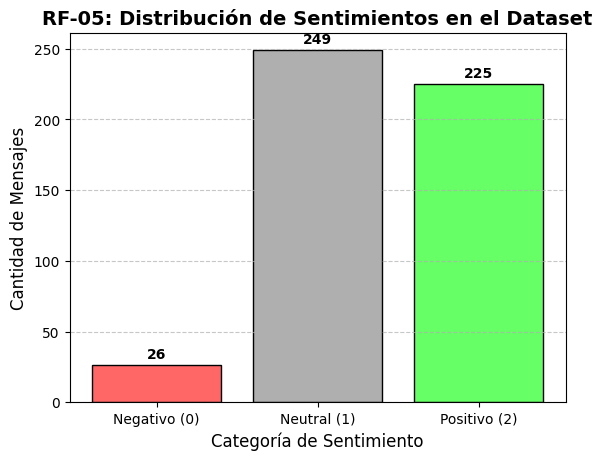

In [ ]:
conteo_sentimientos = df_datos['sentimiento'].value_counts().sort_index()
etiquetas = ['Negativo (0)', 'Neutral (1)', 'Positivo (2)']
colores = ['#ff6666', '#afafaf', '#66ff66']  # Rojo suave, Gris, Verde suave
plt.bar(etiquetas, conteo_sentimientos, color=colores, edgecolor='black')
plt.title('RF-05: Distribución de Sentimientos en el Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Categoría de Sentimiento', fontsize=12)
plt.ylabel('Cantidad de Mensajes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#  Añadir el número exacto sobre cada barra
for i, v in enumerate(conteo_sentimientos):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

# Guardar para la presentación
plt.savefig('grafico_desbalance.png')

RF-06: Similitud Textual
Utilizamos la **Similitud de Coseno** para comparar los vectores TF-IDF de todos los mensajes entre sí.
- Esto nos permite detectar **duplicados** (usuarios reportando el mismo error).
- Identificamos **plantillas automáticas** (Boilerplate) cuando la similitud es cercana al 100%.

In [ ]:
# RF-06: Análisis de Similitud Textual ---
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
#  Calculamos la similitud de todos contra todos
similitud_matriz = cosine_similarity(tfidf_matrix)
# . Anulamos la diagonal (para que no diga que el mensaje 1 es igual al mensaje 1)
np.fill_diagonal(similitud_matriz, 0)
# Buscamos los 3 pares de mensajes MÁS parecidos
indices_maximos = np.unravel_index(np.argsort(similitud_matriz, axis=None)[-6:], similitud_matriz.shape)

print(" RF-06: Reporte de Mensajes Duplicados o Similares =")
pares_vistos = set()

for i, j in zip(indices_maximos[0], indices_maximos[1]):
    par = tuple(sorted((i, j)))
    if par not in pares_vistos:
        print(f"\n🔹 Similitud del {similitud_matriz[i, j]:.1%}:")
        print(f"   Mensaje A (Fila {i}): {df_datos['texto_limpio'].iloc[i][:100]}...")
        print(f"   Mensaje B (Fila {j}): {df_datos['texto_limpio'].iloc[j][:100]}...")
        pares_vistos.add(par)

 RF-06: Reporte de Mensajes Duplicados o Similares =

🔹 Similitud del 100.0%:
   Mensaje A (Fila 369): bouke add extractor important prs without template closed closes details open summary template summa...
   Mensaje B (Fila 363): faphouse add extractor important prs without template closed closes details open summary template su...

🔹 Similitud del 100.0%:
   Mensaje A (Fila 369): bouke add extractor important prs without template closed closes details open summary template summa...
   Mensaje B (Fila 408): croatian film add extractor important prs without template closed closes details open summary templa...

🔹 Similitud del 100.0%:
   Mensaje A (Fila 363): faphouse add extractor important prs without template closed closes details open summary template su...
   Mensaje B (Fila 408): croatian film add extractor important prs without template closed closes details open summary templa...


RF-05: Categorización de Temas (Clustering)
Aplicamos **K-Means** para agrupar los mensajes en 4 categorías automáticas (Clusters) sin etiquetas previas.
Esto nos ayuda a entender los tópicos principales del repositorio (ej. Problemas de instalación, Pull Requests, Dudas de CLI).

In [ ]:
#RF-Categorización: Detección de Temas con K-Means ---
from sklearn.cluster import KMeans
#  Configuración: Vamos a buscar 4 temas principales
# (Puedes cambiar n_clusters a 3 o 5 si quieres probar)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Entrenamiento: Agrupamos los mensajes usando la matriz TF-IDF
kmeans.fit(tfidf_matrix)
#  Guardamos el resultado en el DataFrame
df_datos['tema_cluster'] = kmeans.labels_

# Interpretación: ¿Qué palabras definen cada tema?
print("=== Categorización: Temas Detectados en el Repositorio ===")
terminos = vectorizador.get_feature_names_out()
orden_centroides = kmeans.cluster_centers_.argsort()[:, ::-1] # Ordenamos de mayor a menor importancia

for i in range(4):
    print(f"TEMA {i}:")
    # Mostramos las 10 palabras más importantes de este grupo
    palabras_clave = [terminos[ind] for ind in orden_centroides[i, :10]]

    # Contamos cuántos mensajes cayeron en este tema
    cantidad = len(df_datos[df_datos['tema_cluster'] == i])

    print(f"   Palabras Clave: {', '.join(palabras_clave)}")
    print(f"   Cantidad de mensajes: {cantidad}")

=== Categorización: Temas Detectados en el Repositorio ===
TEMA 0:
   Palabras Clave: youtube, debug, debug youtube, downloading, dlp, player, download, error, deno, line
   Cantidad de mensajes: 153
TEMA 1:
   Palabras Clave: pull, pull request, unlicense, pull requests, open, request, remove, code, remove others, check apply
   Cantidad de mensajes: 149
TEMA 2:
   Palabras Clave: dlp, command, output, verbose, dlp command, line, command line, verbose output, question, readme
   Cantidad de mensajes: 72
TEMA 3:
   Palabras Clave: debug, dlp, line, yt_dlp, utf, file, file yt_dlp, dlp dlp, command, generic
   Cantidad de mensajes: 126


Como podemos Ver al dividir en Cuatro Clusters, en el

**Tema 0** encontramos **"Errrores de descarga  y Ejecución"** , con palabras como youtube , dowlands, debug , por lo general son usuarios que tienen ciertos problemas descargando videos.

**Tema 1** encontramos **"contribuciones y mantenimiento"** con palabras como Open o Pull Request la mayoria de ellos son desarrolladores dando soluciones a problemas.

**Tema 2** encontramos **"Depuracon técnica y archivos"** con pralabras como File o utf puedn ser problemas a las descarga de archivos con caracteres extraños

**Tema 3** encontramos **"Uso de Línea de Comandos" (CLI)**  con palabras como command que es la que mas se repite son dudas de los usuarios sobre como escribir comandos en las consolas.